In [ ]:
import numpy as np
with open("R34.txt", "r") as f:
  d, n, m, k, p = [int(x) for x in f.readline().split()]
  ks = [int(x) for x in f.readline().split()]
  data = [[float(x) for x in string.split()] for string in f.readlines()]
  data = np.array(data)

data.shape

(47445, 20)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
clf.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
k = p

idx = np.argpartition(clf.negative_outlier_factor_, k)

outliers = idx[:k]
normals = idx[k:]
outliers

array([], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_embedded = pca.fit_transform(data)

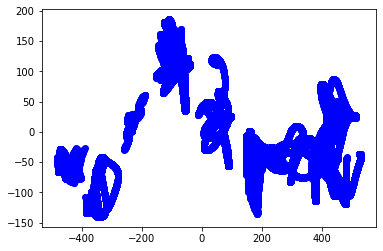

In [ ]:
plt.scatter(pca_embedded[outliers][:,0], pca_embedded[outliers][:,1], c = 'red')
plt.scatter(pca_embedded[normals][:,0], pca_embedded[normals][:,1], c = 'blue')
# plt.scatter(pca_embedded[:,0], pca_embedded[:,1])
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=m, linkage='single').fit(data[normals])
                                                                         

In [ ]:
manifolds = []
for i in range(m):
  manifolds.append(normals[clustering.labels_ == i])

In [ ]:
remained = list(range(m))
clusters_num = [-1] * m


for kk in ks:
  best_metric = 1e20
  best_manifold = -1
  for rem in remained:
    # clustering_new = KMeans(n_clusters=kk, random_state=0).fit(data[manifolds[rem]] / (0.1 * np.linalg.norm(data[manifolds[rem]], axis=1)[:,np.newaxis]))
    clustering_new = AgglomerativeClustering(n_clusters=kk, linkage='single', compute_distances=True).fit(data[manifolds[rem]])
    if np.max(clustering_new.distances_) < best_metric:
      best_manifold = rem
    print(2)
  print(1)

  clusters_num[best_manifold] = kk
  remained.remove(best_manifold)


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
1
2
2
2
1
2
2
1
2
1


In [ ]:
clusters_num

[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3]

In [ ]:
for i in range(m):
  print(len(manifolds[i]))

2723
2783
5684
2726
2726
1844
2838
2751
2849
2726
2838
2751
2844
2726
2844
943
2849


In [ ]:
!pip install scikit-dimension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 


In [ ]:
import skdim
lpca = skdim.id.lPCA().fit_pw(data[normals])

In [ ]:
dimensions = lpca.dimension_pw_

In [ ]:
dimensions

array([2, 1, 1, ..., 1, 1, 2])

In [ ]:
uno = normals[dimensions <= 1]
don = normals[dimensions >= 1.5]

In [ ]:
len(uno)

30603

In [ ]:
test_arr = []
for test_k in range(2, m-1):
  clustering_uno = AgglomerativeClustering(n_clusters=test_k, linkage='single', compute_distances=True).fit(data[uno])
  clustering_don = AgglomerativeClustering(n_clusters=m - test_k, linkage='single', compute_distances=True).fit(data[don])
  test_arr.append(clustering_uno.distances_[len(uno) - test_k] + clustering_don.distances_[len(don) - (m - test_k)])
  print(test_arr[-1])

292.12279934434713
262.8829108915812
207.7257432485426
204.73665140262634
247.6786842047913
254.30654239077643
257.832150027386
267.2393944897319
300.87757229856607
305.0284773935873
324.3076675407489
328.8122251886974
320.559242442131
351.0789861542261


In [ ]:
uno_k, don_k = 10, m - 10

In [ ]:
clustering_uno = AgglomerativeClustering(n_clusters=uno_k, linkage='single', compute_distances=True).fit(data[uno])
clustering_don = AgglomerativeClustering(n_clusters=don_k, linkage='single', compute_distances=True).fit(data[don])

In [ ]:
manifolds = []
for i in range(uno_k):
  manifolds.append(uno[clustering_uno.labels_ == i])
for i in range(don_k):
  manifolds.append(don[clustering_don.labels_ == i])

In [ ]:
for i in range(m):
  print(len(manifolds[i]))

4532
5688
2814
2847
2727
943
2726
2726
2849
2751
13945
2723
53
39
58
13
11


In [ ]:
num_clusters

NameError: ignored

In [ ]:
clustering_uno.distances_

array([9.18595391e-02, 9.78988524e-02, 9.88532805e-02, ...,
       1.54328823e+02, 2.21968302e+02, 2.53266740e+02])

In [ ]:
len(uno)

30603

In [ ]:
test_arr

[99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131,
 99737.08550540131]

In [ ]:
def find_dimension(data):
  farah = skdim.id.MADA().fit(data)
  if int(farah.dimension_) >= 3:
    return 2
  return round(farah.dimension_)

In [ ]:
def to_str_c(data):
  ans = ""
  for i in range(len(data)):
    ans += str(data[i]) + " "
  return ans

In [ ]:
ne = [30] * m
def get_complex_data(label, c, cnum=1):
  
  di = find_dimension(data[label])
  ans = f'{di} {cnum} Complex\n'
  
  indices = label + 1

  clustering_t = SpectralClustering(n_clusters=cnum, n_neighbors = ne[c], affinity = 'nearest_neighbors', random_state=0).fit(data[label])
  # clustering_t = AgglomerativeClustering(n_clusters=cnum, linkage='single').fit(data[label])

  for jj in range(cnum):
    temp = indices[clustering_t.labels_ == jj] 
    ans += f'{len(temp)} {(to_str_c(np.sort(temp)))}\n'

  
  return ans


In [ ]:
from sklearn.cluster import SpectralClustering

isComplex = [True] * 30
ans = f'{n} {m}\n'
for i in range(m):
  if isComplex[i]:
    ans += get_complex_data(manifolds[i], i, clusters_num[i])
  print(f"{i}th manifold has been handled!")
ans += f'{len(outliers)} {to_str_c(outliers + 1)}'

0th manifold has been handled!
1th manifold has been handled!
2th manifold has been handled!
3th manifold has been handled!
4th manifold has been handled!
5th manifold has been handled!
6th manifold has been handled!
7th manifold has been handled!
8th manifold has been handled!
9th manifold has been handled!
10th manifold has been handled!
11th manifold has been handled!
12th manifold has been handled!
13th manifold has been handled!
14th manifold has been handled!
15th manifold has been handled!


KeyboardInterrupt: ignored

In [ ]:
with open("output.txt", "w") as f:
  f.write(ans)